In [1]:
"""import tweepy
import csv #Import csv
auth = tweepy.auth.OAuthHandler('xxxxxxxxx', 'xxxxxxxxxxxx')
auth.set_access_token('xxxxxxxxxx', 'xxxxxxxxxxxx')

api = tweepy.API(auth,wait_on_rate_limit=True)

# Open/create a file to append data to
csvFile = open('dataset.csv', 'a',encoding="utf-8",newline='')

#Use csv writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,count=100000,
                           q = "Covid-19",re.sub('[^a-zA-Z]', '',clean )
                           tweet_mode='extended',
                           lang = "en").items():

    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.full_text,tweet.user.screen_name,tweet.user.location])
    print(tweet.full_text,tweet.user.screen_name,tweet.user.location)
csvFile.close()"""

'import tweepy\nimport csv #Import csv\nauth = tweepy.auth.OAuthHandler(\'xxxxxxxxx\', \'xxxxxxxxxxxx\')\nauth.set_access_token(\'xxxxxxxxxx\', \'xxxxxxxxxxxx\')\n\napi = tweepy.API(auth,wait_on_rate_limit=True)\n\n# Open/create a file to append data to\ncsvFile = open(\'dataset.csv\', \'a\',encoding="utf-8",newline=\'\')\n\n#Use csv writer\ncsvWriter = csv.writer(csvFile)\n\nfor tweet in tweepy.Cursor(api.search,count=100000,\n                           q = "Covid-19",re.sub(\'[^a-zA-Z]\', \'\',clean )\n                           tweet_mode=\'extended\',\n                           lang = "en").items():\n\n    # Write a row to the CSV file. I use encode UTF-8\n    csvWriter.writerow([tweet.full_text,tweet.user.screen_name,tweet.user.location])\n    print(tweet.full_text,tweet.user.screen_name,tweet.user.location)\ncsvFile.close()'

In [3]:
import pandas as pd
file_name='C:/Users/Piyush Jain/Downloads/csv/dataset.csv'
data = pd.read_csv(file_name, sep = ',',names = ['text','username','location'])
data.shape

(131563, 3)

In [4]:
data.head()


,text,username,location
0,RT @tsum_africa: In response to the current #C...,PaulABarter,Singapore
1,RT @FemAdesina: No presidential broadcast on C...,Abdulazizmento2,port Harcourt
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,Ricardo_Gardel,"Tinton Falls, NJ"
3,RT @ChangeOrg_India: Walking miles without foo...,ahumanenough,NaN
4,RT @GhulamABilour: I have been tested positive...,tormakhay_s,"Sexi, Peru"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131563 entries, 0 to 131562
Data columns (total 3 columns):
text        131563 non-null object
username    131563 non-null object
location    92721 non-null object
dtypes: object(3)
memory usage: 3.0+ MB


In [6]:
data=data[(data['location'].notnull())]                      #dropping empty row
data = data.sample(frac=1).reset_index(drop=True)           #resetting index
data['len']=data["text"].str.len()                          #removing clipped tweets
df1= data[(data['len'] <=137)]
df2=data[(data['len'] >=150)]
data=pd.concat([df1,df2])                              
data = data.sample(frac=1).reset_index(drop=True)       #resetting index

In [7]:
data.shape

(35482, 4)

In [8]:
data.head()

,text,username,location,len
0,🇬🇧 My thoughts during April and the #COVID sto...,KianhFoundation,"Hoi An, Central Vietnam",110
1,Covid-19 crisis: Industry welcomes investments...,KSA567go,भारत,131
2,Considering #B2B research in the middle of #co...,WalnutUnlimited,London,217
3,"Personnel of 4th MFP, 1st ISPMFC led by PSMS J...",isppsc,"Bulag, Bantay, Ilocos Sur",304
4,"Dokpesi Asks AIT, @RaypowerNetwork To Pull Dow...",Gen_Buhar,Heaven,153


In [9]:
import numpy as np
import re
def remove_pattern(input_txt, pattern):                                           #function to remove pattern 
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    lst = np.vectorize(remove_pattern)(lst, "\r")                                  
    lst = np.vectorize(remove_pattern)(lst, "\n")
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")                         # removing RT @x from tweets:
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")                             # removing  @xxx from tweets 
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")            # reremoving URL links http://xxx
    return lst

In [10]:
data['clean']= clean_tweets(data['text'])   #Cleaned Tweets are kept in separate coloumn

In [11]:
data.head()

,text,username,location,len,clean
0,🇬🇧 My thoughts during April and the #COVID sto...,KianhFoundation,"Hoi An, Central Vietnam",110,🇬🇧 My thoughts during April and the #COVID sto...
1,Covid-19 crisis: Industry welcomes investments...,KSA567go,भारत,131,Covid-19 crisis: Industry welcomes investments...
2,Considering #B2B research in the middle of #co...,WalnutUnlimited,London,217,Considering #B2B research in the middle of #co...
3,"Personnel of 4th MFP, 1st ISPMFC led by PSMS J...",isppsc,"Bulag, Bantay, Ilocos Sur",304,"Personnel of 4th MFP, 1st ISPMFC led by PSMS J..."
4,"Dokpesi Asks AIT, @RaypowerNetwork To Pull Dow...",Gen_Buhar,Heaven,153,"Dokpesi Asks AIT, To Pull Down Comment On COV..."


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer           #vaderSentiment is used to tag tweets as positive, negative or neutral
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    if score['compound'] >= 0.05 :
        return 2
    elif (score['compound'] > -0.05) and (score['compound'] < 0.05) : 
        return 1 
    else :
        return 0

In [13]:
sentiments_using_vader = data.clean.apply(lambda text: sentiment_analyzer_scores(text))     #Each tweet goes throug vader function and gets labeled.
pd.DataFrame(sentiments_using_vader.value_counts())

,clean
2,15679
0,10346
1,9457


In [14]:
data['sentiment'] = sentiments_using_vader
data.head()

,text,username,location,len,clean,sentiment
0,🇬🇧 My thoughts during April and the #COVID sto...,KianhFoundation,"Hoi An, Central Vietnam",110,🇬🇧 My thoughts during April and the #COVID sto...,1
1,Covid-19 crisis: Industry welcomes investments...,KSA567go,भारत,131,Covid-19 crisis: Industry welcomes investments...,2
2,Considering #B2B research in the middle of #co...,WalnutUnlimited,London,217,Considering #B2B research in the middle of #co...,2
3,"Personnel of 4th MFP, 1st ISPMFC led by PSMS J...",isppsc,"Bulag, Bantay, Ilocos Sur",304,"Personnel of 4th MFP, 1st ISPMFC led by PSMS J...",1
4,"Dokpesi Asks AIT, @RaypowerNetwork To Pull Dow...",Gen_Buhar,Heaven,153,"Dokpesi Asks AIT, To Pull Down Comment On COV...",0


In [15]:
data.describe()

,len,sentiment
count,35482.000000,35482.000000
mean,162.006961,1.150302
std,77.083169,0.843149
min,8.000000,0.000000
25%,98.000000,0.000000
50%,129.000000,1.000000
75%,233.000000,2.000000
max,832.000000,2.000000


In [16]:
# remove special characters, numbers, punctuations (except for #)
data['clean'] = data['clean'].str.replace("[^a-zA-Z# ]", "")

In [19]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
from nltk.corpus import stopwords
cleaned_tweets = []
for index, row in data.iterrows():            #This loop goes through every tweets and removes stopwords covnverts into lower case and applyes lematization
    words_without_stopwords = [wl.lemmatize(word.lower()) for word in row.clean.split() if not word in set(stopwords.words('english')) and '#' not in word.lower()]
    cleaned_tweets.append(' '.join(words_without_stopwords))
data['Fully_cleaned_tweets'] = cleaned_tweets
data.head(10)

[nltk_data] Downloading package wordnet to C:\Users\Piyush
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,text,username,location,len,clean,sentiment,Fully_cleaned_tweets
0,🇬🇧 My thoughts during April and the #COVID sto...,KianhFoundation,"Hoi An, Central Vietnam",110,My thoughts during April and the #COVID storm...,1,my thought april storm jackie wrafter
1,Covid-19 crisis: Industry welcomes investments...,KSA567go,भारत,131,Covid crisis Industry welcomes investments in ...,2,covid crisis industry welcome investment healt...
2,Considering #B2B research in the middle of #co...,WalnutUnlimited,London,217,Considering #BB research in the middle of #cov...,2,considering research middle finding business d...
3,"Personnel of 4th MFP, 1st ISPMFC led by PSMS J...",isppsc,"Bulag, Bantay, Ilocos Sur",304,Personnel of th MFP st ISPMFC led by PSMS Juli...,1,personnel th mfp st ispmfc led psms julius abe...
4,"Dokpesi Asks AIT, @RaypowerNetwork To Pull Dow...",Gen_Buhar,Heaven,153,Dokpesi Asks AIT To Pull Down Comment On COVI...,0,dokpesi asks ait to pull down comment on covid...
5,"In victory over polio, hope for the battle aga...",tzack16,"Chicago, IL",134,In victory over polio hope for the battle agai...,2,in victory polio hope battle covid
6,"Last week, AMPLYFI identified and analysed &gt...",ganje_chris,Cardiff,282,Last week AMPLYFI identified and analysed gt U...,2,last week amplyfi identified analysed gt ukrel...
7,Coronavirus: Isle of Wight downloads of COVID-...,NewAmarillyan,new,102,Coronavirus Isle of Wight downloads of COVID t...,1,coronavirus isle wight downloads covid trial a...
8,Our latest statement on coronavirus (COVID-19)...,DMorganguardian,"Knutsford, England",70,Our latest statement on coronavirus COVID,1,our latest statement coronavirus covid
9,@CornellSports athletes are teaming up with @L...,opperman_mary,"Ithaca, NY",275,athletes are teaming up with for a virtual K...,2,athlete teaming virtual k fundraiseractive aga...


In [20]:
import seaborn as sns
sents =[]
for tw in data.Fully_cleaned_tweets:
    st = sentiment_analyzer_scores(tw)
    sents.append(st)
ax = sns.distplot(sents,kde=False,bins=3)
ax.set(xlabel='Negative              Neutral               Positive',ylabel='#Tweets',title="Tweets of USA-corona")

[Text(0, 0.5, '#Tweets'),
 Text(0.5, 0, 'Negative              Neutral               Positive'),
 Text(0.5, 1.0, 'Tweets of USA-corona')]

In [21]:
from collections import Counter

def con(sentence):
    emotion_list = []
    sentence = sentence.split(' ')
    with open('emotions.txt','r') as file:
        for line in file:
            clear_line = line.replace("\n", '').replace(",",'').replace("'",'').strip()
            word, emotion = clear_line.split(':')

            if word in sentence:
                emotion_list.append(emotion)
        w = Counter(emotion_list)
        return w

In [23]:
data['emotion'] = data['Fully_cleaned_tweets'].apply(lambda x: con(x) )

In [24]:
data.head(10)

,text,username,location,len,clean,sentiment,Fully_cleaned_tweets,emotion
0,🇬🇧 My thoughts during April and the #COVID sto...,KianhFoundation,"Hoi An, Central Vietnam",110,My thoughts during April and the #COVID storm...,1,my thought april storm jackie wrafter,{}
1,Covid-19 crisis: Industry welcomes investments...,KSA567go,भारत,131,Covid crisis Industry welcomes investments in ...,2,covid crisis industry welcome investment healt...,{}
2,Considering #B2B research in the middle of #co...,WalnutUnlimited,London,217,Considering #BB research in the middle of #cov...,2,considering research middle finding business d...,{}
3,"Personnel of 4th MFP, 1st ISPMFC led by PSMS J...",isppsc,"Bulag, Bantay, Ilocos Sur",304,Personnel of th MFP st ISPMFC led by PSMS Juli...,1,personnel th mfp st ispmfc led psms julius abe...,{}
4,"Dokpesi Asks AIT, @RaypowerNetwork To Pull Dow...",Gen_Buhar,Heaven,153,Dokpesi Asks AIT To Pull Down Comment On COVI...,0,dokpesi asks ait to pull down comment on covid...,{' sad': 1}
5,"In victory over polio, hope for the battle aga...",tzack16,"Chicago, IL",134,In victory over polio hope for the battle agai...,2,in victory polio hope battle covid,{}
6,"Last week, AMPLYFI identified and analysed &gt...",ganje_chris,Cardiff,282,Last week AMPLYFI identified and analysed gt U...,2,last week amplyfi identified analysed gt ukrel...,{' esteemed': 1}
7,Coronavirus: Isle of Wight downloads of COVID-...,NewAmarillyan,new,102,Coronavirus Isle of Wight downloads of COVID t...,1,coronavirus isle wight downloads covid trial a...,{}
8,Our latest statement on coronavirus (COVID-19)...,DMorganguardian,"Knutsford, England",70,Our latest statement on coronavirus COVID,1,our latest statement coronavirus covid,{}
9,@CornellSports athletes are teaming up with @L...,opperman_mary,"Ithaca, NY",275,athletes are teaming up with for a virtual K...,2,athlete teaming virtual k fundraiseractive aga...,{}


In [25]:
emo=con(data['Fully_cleaned_tweets'].sum())

In [26]:
data['text'][8]

'Our latest statement on coronavirus (COVID-19) https://t.co/36ZSX78APs'

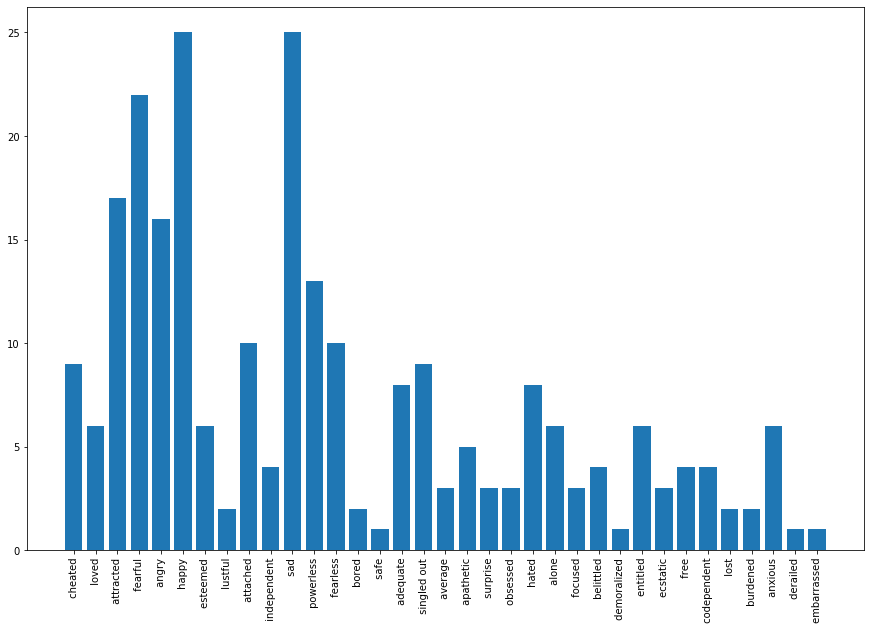

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.bar(emo.keys(),emo.values())
plt.xticks(rotation = 90)
plt.show()

In [28]:
from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator
import urllib
import requests
import matplotlib.pyplot as plt
def generate_wordcloud(all_words):
    Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
    image_colors = ImageColorGenerator(Mask)
    wc = WordCloud(background_color='black', height=750, width=2000,mask=Mask).generate(all_words)
    plt.figure(figsize=(10,20))
    plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
    plt.axis('off')
    plt.show()

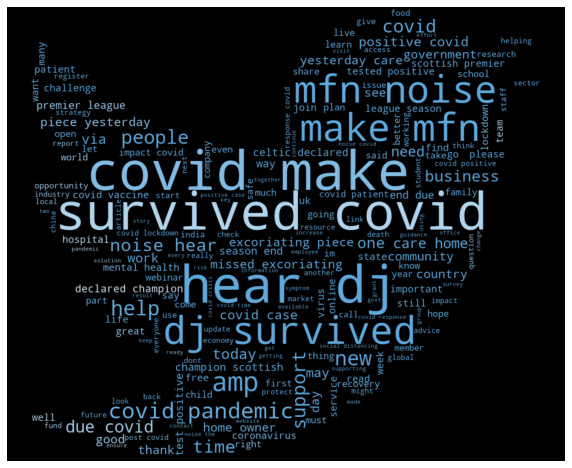

In [29]:
all_words = ' '.join([text for text in data['Fully_cleaned_tweets'][data.sentiment == 2]])
generate_wordcloud(all_words)

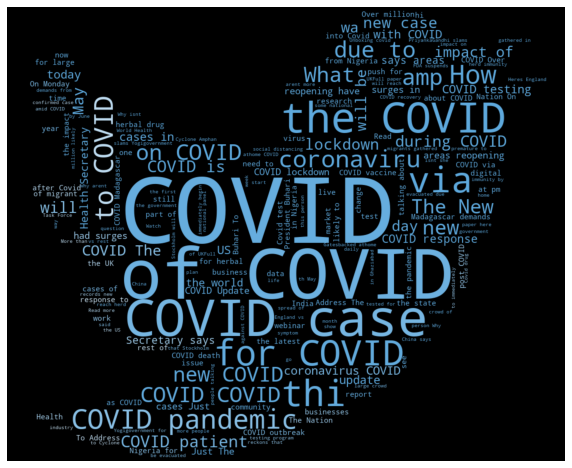

In [32]:
all_words = ' '.join([text for text in data['clean'][data.sentiment == 1]])
generate_wordcloud(all_words)

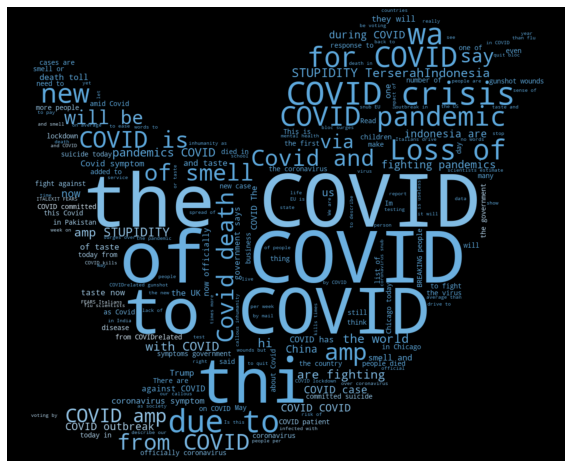

In [33]:
all_words = ' '.join([text for text in data['clean'][data.sentiment == 0]])
generate_wordcloud(all_words)

In [34]:
import nltk
                                                  #function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [35]:
hashtags = hashtag_extract(data['clean'])
hashtags = sum(hashtags, [])

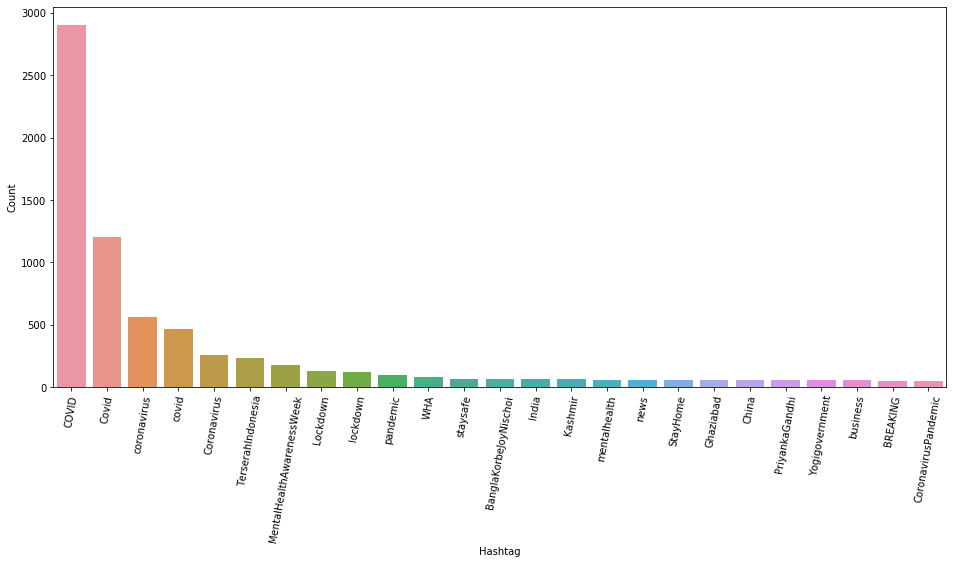

In [36]:
generate_hashtag_freqdist(hashtags)

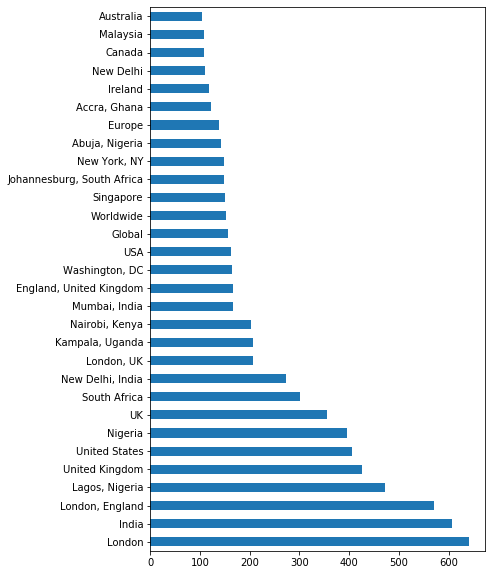

In [37]:
data['location'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

In [38]:
x = data.iloc[:,-2].values
y = data.iloc[:,-3].values

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
x = tfidf_word_vectorizer.fit_transform(x)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
predictions = classifier.predict(X_test.toarray())

In [43]:
test=pd.read_csv('TestTweet.csv')

In [44]:
test['clean']=clean_tweets(test['text']) 
test['clean']=test['clean'].str.replace("[^a-zA-Z ]", " ")

In [45]:
for i,tweet in enumerate(test['clean']):
    op=classifier.predict(tfidf_word_vectorizer.transform([tweet]).toarray())
    if op == [0]:
        print(i,")"," ' ",test.text[i]," ' ",'\n','=','NEGATIVE','\n')
    if op == [1]:
        print(i,")"," ' ",test.text[i]," ' ",'\n','=','NEUTRAL','\n')
    if op == [2]:
        print(i,")"," ' ",test.text[i]," ' ",'\n','=','POSITIVE','\n')

0 )  '  RT @djnicholl: Show us proof that Johnson is following science, MPs urge 

https://t.co/aN9ofVaQBV  '  
 = NEUTRAL 

1 )  '  Why people think 5G responsible for coronavirus https://t.co/jloVJuO0G0 via @YouTube  '  
 = NEUTRAL 

2 )  '  Yesterday I was walking along a pier of the #Amsterdam Oude Houthaven when an angry houseboat resident invited me leave as "they don't like walkers due to the #coronavirus" WTF...  '  
 = POSITIVE 

3 )  '  RT @WyeLea: The coronavirus crisis must not be allowed to delay Brexit https://t.co/4n6mip2MVg  '  
 = NEGATIVE 

4 )  '  #N4P #C4XD #IQAI 
Coronavirus: Moderna’s US vaccine first trials show immune response https://t.co/2vy25EMqEY  '  
 = POSITIVE 

5 )  '  @HeshmatAlavi China knew what they were doing as soon as President Trump signed those papers. China will fulfill their deal as long as no pandemic happens. TWO days later &amp; here is Coronavirus knocking at our doors! Sue them, I say.  '  
 = NEUTRAL 

6 )  '  RT @jonworth: Even by Brexi

80 )  '  'I'm just glad we're able to do something for them': Capital High School seniors honored as the Class of COVID-19 https://t.co/F3Cr1K1cJ6  '  
 = NEUTRAL 

81 )  '  Russia reports 9,263 new cases of coronavirus and 115 new deaths over the past 24 hours, raising the total to 299,941 cases and 2,837 dead. There are 7,352,316 patients tested in the country so far.  '  
 = NEGATIVE 

82 )  '  RT @Nux_Taku: I hope Coronavirus pulls a "No Game No Life" and never gets a sequel  '  
 = NEUTRAL 

83 )  '  RT @Pun_Starr: I think BJP leaders should most beware of Zee News journalists. Coronavirus can be transferred through boot licking.  '  
 = NEUTRAL 

84 )  '  RT @liltxhurricane4: Coronavirus aid for undocumented immigrants in California kicks off on May 18 https://t.co/FTRdHr9aOa via @nbcnews  '  
 = NEUTRAL 

85 )  '  Antibody that inhibits the new coronavirus discovered in patient who had SARS 17 years ago https://t.co/OD56ugBYbP  '  
 = NEUTRAL 

86 )  '  RT @JoyceWhiteVance: Foll

151 )  '  #Democrats have a plan for the #coronavirus that was started in the #UnitedStates in 2019 with #Republicans in control. #JoeBiden is the answer. 
#TrumpTrialForCoronavirusDeaths

#NancyPelosiAmericanHero https://t.co/fCvREjKzVj  '  
 = NEUTRAL 

152 )  '  #Oregon coronavirus restrictions kept in place, for now - May 19 @ 4:15 AM ET https://t.co/Pv8sry0tR1  '  
 = NEUTRAL 

153 )  '  Saturday Sunshine Drenched Beltzville Park
Friday was the first day coronavirus lockdown orders were lifted at Beltzville State Park in Carbon County, 54 miles north of Sanatoga. By Saturday, plenty of people were enjoying sunny time there.
https://t.co/fUDunSAyCl https://t.co/DjQoTFguiJ  '  
 = POSITIVE 

154 )  '  RT @wellbeingvenues: How has lockdown changed Yoga?

https://t.co/R0rgINZmYF

#yoga #coronavirus #onlineyoga  '  
 = NEUTRAL 

155 )  '  RT @Isabel21294528: @CGTNOfficial #Hubei measures the culture and traavel industry #coronavirus 🇨🇳  '  
 = NEUTRAL 

156 )  '  @Ericyip77316500 Past 

232 )  '  RT @medical_xpress: Coronavirus infections may lead to delirium and potentially PTSD @uclnews @TheLancet https://t.co/oXcLalsaIJ  '  
 = NEUTRAL 

233 )  '  Zee Media newsroom, studios sealed after 28 employees test positive for coronavirus - https://t.co/b6Knph0T1q  '  
 = POSITIVE 

234 )  '  @LizzieStokes1 Hi Lizzie, the latest available information is available here: https://t.co/2MF5bOjtFk. However, we do have a dedicated helpline that will be able to clear this up as the guidance may not that specific. Thanks, Anas  '  
 = POSITIVE 

235 )  '  RT @Jordan9ja: #Jib : Oh No! 3-Day-Old Baby Dies After His Mother Contracted #coronavirus Before His Birth: https://t.co/l8k6RX9dD2  '  
 = NEUTRAL 

236 )  '  UK wrong to rule out global coronavirus comparisons, experts say https://t.co/RpS5cjYAa4  '  
 = NEGATIVE 



In [46]:
tweet="@briantylercohen Hey #Insane @realDonaldTrump ! Are you crazy? ANY of them don't need to die at all."
clean=clean_tweets(tweet)
clean=str(clean)
clean=re.sub('[^a-zA-Z]', ' ',clean )
clean=[clean]
op=classifier.predict(tfidf_word_vectorizer.transform(clean).toarray())
if op == [0]:
    print(tweet,'\n','=','NEGATIVE','\n')
if op == [1]:
    print(tweet,'\n','=','NEUTRAL','\n')
if op == [2]:
    print(tweet,'\n','=','POSITIVE','\n')

@briantylercohen Hey #Insane @realDonaldTrump ! Are you crazy? ANY of them don't need to die at all. 
 = NEGATIVE 



In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy score : ',accuracy_score(y_test, predictions)*100,'\n')

Accuracy score :  82.14738621952938 



In [48]:
print(confusion_matrix(y_test,predictions),'\n')

[[1552  233  280]
 [ 101 1619  147]
 [ 199  307 2659]] 



In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      2065
           1       0.75      0.87      0.80      1867
           2       0.86      0.84      0.85      3165

    accuracy                           0.82      7097
   macro avg       0.82      0.82      0.82      7097
weighted avg       0.83      0.82      0.82      7097

